In [ ]:
! pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 670.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bd37df4bf151481e9a830f0b17dfb12814c478b5ed3880c13b68a42433f3d4be
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2 #модуль для работы с морфологией в питоне
import re

import warnings
warnings.filterwarnings('ignore')

##Основные этапы предобработки текстов

##Токенизация

Процесс разбиения текста на более мелкие части, такие как слова или предложения.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [3]:
text = "Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы. Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов. В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив."

In [5]:
text

'Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы. Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов. В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив.'

In [4]:
tokens_split = text.split()

tokens_split[:30]

['Основной',
 'курс',
 'специализации',
 '«Исследования',
 'в',
 'коммуикациях»',
 'отличается',
 'своей',
 'методологической',
 'направленностью,',
 'что',
 'является',
 'его',
 'уникальной',
 'чертой',
 'по',
 'отношению',
 'к',
 'другим',
 'курсам,',
 'реализованным',
 'в',
 'рамках',
 'образовательной',
 'программы.',
 'Задача',
 'данного',
 'курса',
 '–',
 'оснастить']

Чем такой способ разбить текст на токены кажется вам неудачным?

In [6]:
import nltk #Библиотека для обработки естественного языка
nltk.download('punkt') #Модуль библиотеки для работы с пунктуацией
from nltk.tokenize import word_tokenize

tokens_word = word_tokenize(text)
tokens_word[:30]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Основной',
 'курс',
 'специализации',
 '«',
 'Исследования',
 'в',
 'коммуикациях',
 '»',
 'отличается',
 'своей',
 'методологической',
 'направленностью',
 ',',
 'что',
 'является',
 'его',
 'уникальной',
 'чертой',
 'по',
 'отношению',
 'к',
 'другим',
 'курсам',
 ',',
 'реализованным',
 'в',
 'рамках',
 'образовательной',
 'программы',
 '.']

In [7]:
from nltk.tokenize import sent_tokenize

tokens_sent = sent_tokenize(text)

tokens_sent

['Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы.',
 'Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов.',
 'В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив.']

##Предобработка текста

In [8]:
text

'Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы. Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов. В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив.'

Давайте уберем из текста ссылки и посторонние символы. Чтобы это сделать, нужны регулярные выражения -- формальный язык, который используется для поиска и замены текста.

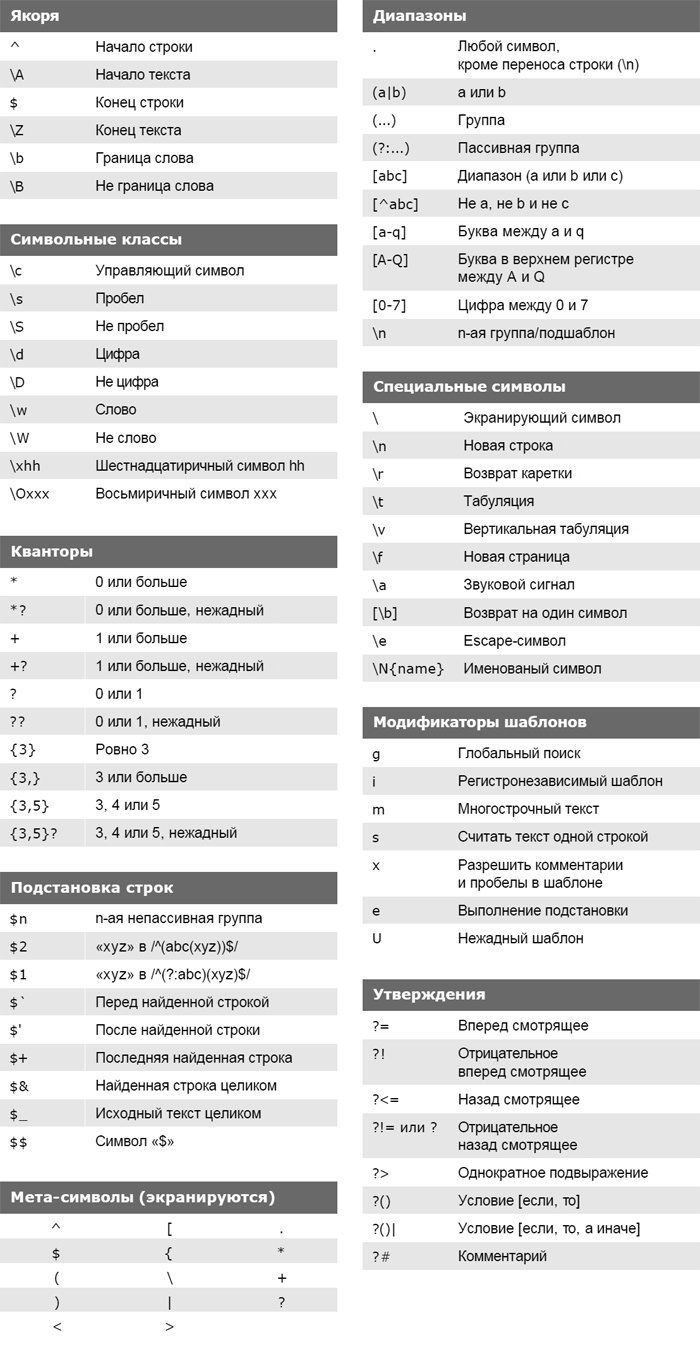

In [9]:
text = re.sub('https?://[^,\s]+,?', ' ', text)
text = re.sub('[^a-zа-яё]+', ' ', text.lower())

text

'основной курс специализации исследования в коммуикациях отличается своей методологической направленностью что является его уникальной чертой по отношению к другим курсам реализованным в рамках образовательной программы задача данного курса оснастить студентов уникальным инстру ментарием для работы с эмпирическими данными агрегации полученных результатов и создания уникальных коммуникационных продуктов в результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения основываясь на креативе подкрепленном результатами исследования на эмпирических материалах что делает такие решения более точными и конкурентными среди прочих альтернатив '

In [10]:
tokens = text.split()
tokens[:30]

['основной',
 'курс',
 'специализации',
 'исследования',
 'в',
 'коммуикациях',
 'отличается',
 'своей',
 'методологической',
 'направленностью',
 'что',
 'является',
 'его',
 'уникальной',
 'чертой',
 'по',
 'отношению',
 'к',
 'другим',
 'курсам',
 'реализованным',
 'в',
 'рамках',
 'образовательной',
 'программы',
 'задача',
 'данного',
 'курса',
 'оснастить',
 'студентов']



*   Чем отличается результат токенизации предобработанного текста от результата токенизации с помощью NLTK?
*   Попробуйте придумать задачу, для работы над которой подойдёт каждый из способов токенизации.


##Стемминг или лемматизация

Стемминг — нахождение основы слова.

Лемматизация — преобразование слова в словарный вид.



In [13]:
# Лемматизация

from pymorphy2 import MorphAnalyzer
analyzer = MorphAnalyzer()

In [14]:
analyzer.parse('коровы')

[Parse(word='коровы', tag=OpencorporaTag('NOUN,anim,femn sing,gent'), normal_form='корова', score=0.5, methods_stack=((DictionaryAnalyzer(), 'коровы', 53, 1),)),
 Parse(word='коровы', tag=OpencorporaTag('NOUN,anim,femn plur,nomn'), normal_form='корова', score=0.5, methods_stack=((DictionaryAnalyzer(), 'коровы', 53, 7),))]

In [15]:
norm_form = analyzer.parse('коровы')[0].normal_form
norm_form

'корова'

In [16]:
analyzer.parse('существует')

[Parse(word='существует', tag=OpencorporaTag('VERB,impf,intr sing,3per,pres,indc'), normal_form='существовать', score=1.0, methods_stack=((DictionaryAnalyzer(), 'существует', 177, 5),))]

In [17]:
ex = ['машина', 'машине', 'машину', 'машиной']

for i in ex:
    print(analyzer.parse(i)[0].normal_form)

машина
машина
машина
машина


In [18]:
# Стемминг

from nltk.stem import PorterStemmer
ps = PorterStemmer()

words = ["game", "gaming", "gamed", "games", "compacted"]
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

Задание: составьте список лемм для мини-текста, с которым мы работаем на семинаре. Какой из списков токенов вам для этого понадобится?

In [ ]:
# (: Ваш код :)

##Стоп слова



*   Самые частотные слова в конкретном языке
*   Мешают получить данные о частотных словах в конкретном тексте
*  Их нужно удалять



In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('russian')
nltk_stopwords_eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(len(nltk_stopwords))
nltk_stopwords[:30]

151


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне']

In [28]:
#Ответ на задание: список лемм

lemmas = []

for i in tokens:
    norm_form = analyzer.parse(i)[0].normal_form
    lemmas.append(norm_form)

In [29]:
lemmas[:10]

['основной',
 'курс',
 'специализация',
 'исследование',
 'в',
 'коммуикация',
 'отличаться',
 'свой',
 'методологический',
 'направленность']

In [31]:
print('Токенов до ', len(lemmas))

for i in lemmas:

    if i in nltk_stopwords:
        lemmas.remove(i)

print('Токенов после ', len(lemmas))

Токенов до  78
Токенов после  61


In [32]:
lemmas[:10]

['основной',
 'курс',
 'специализация',
 'исследование',
 'коммуикация',
 'отличаться',
 'свой',
 'методологический',
 'направленность',
 'являться']

In [33]:
from nltk import FreqDist #Функция, создающая частотный словарь

print('Популярные униграммы: ', FreqDist(lemmas).most_common(4))

Популярные униграммы:  [('курс', 3), ('уникальный', 3), ('результат', 3), ('исследование', 2)]


##Напишем функцию для препроцессинга текста

In [35]:
stop_list_full = nltk_stopwords + nltk_stopwords_eng

def my_preproc(text):

    return_list = []
    buffer_vocab = {}

    text = re.sub('https?://[^,\s]+,?', ' ', text)
    text = re.sub('[^a-zа-я]+', ' ', text.lower())

    for i in text.split():

        if len(i) > 1:

            if i in buffer_vocab:
                return_list.append(buffer_vocab[i])

            else:
                norm_form = analyzer.parse(i)[0].normal_form

                if norm_form not in stop_list_full:
                    buffer_vocab[i] = norm_form
                    return_list.append(norm_form)

                else:
                    continue

    return return_list

In [37]:
my_preproc(text)[:30]

['основной',
 'курс',
 'специализация',
 'исследование',
 'коммуикация',
 'отличаться',
 'свой',
 'методологический',
 'направленность',
 'являться',
 'уникальный',
 'черта',
 'отношение',
 'курс',
 'реализовать',
 'рамка',
 'образовательный',
 'программа',
 'задача',
 'данный',
 'курс',
 'оснастить',
 'студент',
 'уникальный',
 'инстереть',
 'ментарий',
 'работа',
 'эмпирический',
 'данные',
 'агрегация']

##Поработаем с текстами большего объема

Например, с постами одного пользователя ВКонтакте

In [38]:
import requests

#Библиотека, которая позволяет делать запросы

API (англ. Application Programming Interface — программный интерфейс приложения) — это набор способов и правил, по которым различные программы общаются между собой и обмениваются данными.

Поработаем с VK API.

API ВКонтакте — это интерфейс, который позволяет получать информацию из базы данных vk.com с помощью HTTP-запросов к специальному серверу. Синтаксис запросов и тип возвращаемых ими данных строго определены на стороне самого сервиса.

*   Бесплатное
*   Документация лежит [тут](https://dev.vk.com/ru/api/overview)

Есть много методов, большинство требуют авторизации пользователя.

Метод wall.get:
* Позволяет скачать посты со стены пользователя
* Не требует авторазации при отправке запроса, но нужен сервисный ключ доступа

Как его создать?
* Перейти по ссылке https://id.vk.com/about/business/go/create-account
* Создать новое приложение: standalone-приложение, название любое
* Необходимо получить код подтверждения, может быть по номеру телефона
* Если все ок, то вы перейдете в настройки приложения, там можно увидеть ключи доступа. Нас интересует сервисный ключ доступа





In [40]:
wall_get_url = "https://api.vk.com/method/wall.get"

my_token = ""

Скачаем побольше постов со страницы [Бориса Иомдина](https://vk.com/iomdin)


In [41]:
#отправляем запрос, преобразуем результат в словарь

wall_iomdin = requests.get(
    wall_get_url,
    params={
        "owner_id": 17283336,  # ID юзера
        "count": 2000,  # количество постов
        "v": 5.81, # версия API
        "access_token": my_token  # токен доступа
    }
).json()

In [42]:
wall_iomdin

{'response': {'count': 626,
  'items': [{'inner_type': 'wall_wallpost',
    'comments': {'can_post': 1, 'count': 2, 'groups_can_post': True},
    'marked_as_ads': 0,
    'hash': 'Of9zGCc2aZoWMoqPSw',
    'type': 'post',
    'attachments': [{'type': 'link',
      'link': {'url': 'https://stradarium.timepad.ru/event/2802501/',
       'caption': 'stradarium.timepad.ru',
       'description': 'Гарри Поттер и ложные друзья переводчика',
       'photo': {'album_id': -27,
        'date': 1711068111,
        'id': 457491142,
        'owner_id': 2000035310,
        'sizes': [{'height': 480,
          'type': 'k',
          'width': 1074,
          'url': 'https://sun9-65.userapi.com/impg/-m7sIrvFZ9r7H4DtbGZ5hnO7DbY85unuodn1QQ/kQ78hkTIxys.jpg?size=1074x480&quality=96&sign=174ebb36e87596a87df0c5e82b1c5973&c_uniq_tag=qtJNXC89v0jPV0iy1YS1VW4A-eQMIXX7JQzuf5t9RIg&type=share'},
         {'height': 240,
          'type': 'l',
          'width': 537,
          'url': 'https://sun9-65.userapi.com/impg/-m

In [44]:
#Делаем список постов: каждый пост -- отдельный словарь

posts_iomdin = wall_iomdin.get('response').get('items')

In [45]:
posts_iomdin[0]

{'inner_type': 'wall_wallpost',
 'comments': {'can_post': 1, 'count': 2, 'groups_can_post': True},
 'marked_as_ads': 0,
 'hash': 'Of9zGCc2aZoWMoqPSw',
 'type': 'post',
 'attachments': [{'type': 'link',
   'link': {'url': 'https://stradarium.timepad.ru/event/2802501/',
    'caption': 'stradarium.timepad.ru',
    'description': 'Гарри Поттер и ложные друзья переводчика',
    'photo': {'album_id': -27,
     'date': 1711068111,
     'id': 457491142,
     'owner_id': 2000035310,
     'sizes': [{'height': 480,
       'type': 'k',
       'width': 1074,
       'url': 'https://sun9-65.userapi.com/impg/-m7sIrvFZ9r7H4DtbGZ5hnO7DbY85unuodn1QQ/kQ78hkTIxys.jpg?size=1074x480&quality=96&sign=174ebb36e87596a87df0c5e82b1c5973&c_uniq_tag=qtJNXC89v0jPV0iy1YS1VW4A-eQMIXX7JQzuf5t9RIg&type=share'},
      {'height': 240,
       'type': 'l',
       'width': 537,
       'url': 'https://sun9-65.userapi.com/impg/-m7sIrvFZ9r7H4DtbGZ5hnO7DbY85unuodn1QQ/kQ78hkTIxys.jpg?size=537x240&quality=96&sign=ae9f28e4e93f007b57

In [46]:
#Сколько постов получилось?

len(posts_iomdin)

100

Метод wall.get скачивает по 100 постов

Есть параметр offset, который определяет, с какого поста начинать скачивание

In [47]:
from tqdm import tqdm

#Функция, которая создает диаграмму-индикатор выполнения программы

In [50]:
all_posts_iomdin = []
for number in tqdm(range(0,2000,100)):
  offset = number
  wall = requests.get(
    wall_get_url,
    params={
        "owner_id": 17283336,
        "count": 5000,
        "v": 5.81,
        'offset':offset,
        "access_token": my_token}).json()
  posts = wall.get('response').get('items')
  all_posts_iomdin.extend(posts)

100%|██████████| 20/20 [00:13<00:00,  1.51it/s]


In [51]:
#Мы скачали все посты со страницы Бориса Иомдина

len(all_posts_iomdin)

626

In [53]:
#Создаем строку с текстами всех постов

text_of_posts = ''

for post in all_posts_iomdin:
  text = post.get('text')
  text_of_posts = text_of_posts+text.lower()+' '

In [54]:
#Применяем функцию для предобработки, которую мы написали

preproc_iomdin = my_preproc(text_of_posts)

In [55]:
print('Популярные униграммы: ', FreqDist(preproc_iomdin).most_common(20))

Популярные униграммы:  [('опрос', 203), ('спасибо', 152), ('участие', 147), ('слово', 118), ('комментарий', 118), ('рождение', 114), ('день', 87), ('новый', 79), ('репост', 74), ('наш', 60), ('чтозапредмет', 60), ('язык', 53), ('весь', 52), ('большой', 46), ('распространение', 46), ('дн', 43), ('это', 41), ('ещё', 36), ('лингвистика', 32), ('интересный', 29)]


Домашнее задание: создайте сервисный ключ доступа для VK API